# Minimum Variance Distortionless Response (MVDR) Beamformer

*This Jupyter notebook is part of a [collection of notebooks](../index.ipynb) in the masters module Selected Topics in Audio Signal Processing, Communications Engineering, Universität Rostock. Please direct questions and suggestions to [Sascha.Spors@uni-rostock.de](mailto:Sascha.Spors@uni-rostock.de).*

## Design of MVDR Beamformer

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

dx = 0.1  # spatial sampling interval
M = 8  # total number of microphones
om = 2*np.pi * np.linspace(100, 8000, 1000)  # evaluated angular frequencies
theta = np.pi/2  # steering direction

c = 343  # speed of sound

First a function is defined which computes the complex weights of a narrowband MVDR beamformer

In [2]:
def design_mvdr(theta, omega):
    d = np.exp(1j*omega * dx/c * np.cos(theta) * np.arange(M)).T
    Gd = np.zeros(shape=(M,M))
    for i in range(M):
        for j in range(M):
            Gd[i, j] = np.sinc(omega * (j-i) * dx/c * 1/np.pi)
    
    h = np.dot(np.linalg.inv(Gd), d) / np.dot(np.dot(d.conj().T, np.linalg.inv(Gd)), d)
    
    return h

## Beampattern

The resulting beampattern of the MVDR beamformer is computed and plotted for a steering angle of $\theta = 90^\text{o}$ (broadside operation)

In [3]:
def compute_beampattern(theta, theta_pw, om):
    B = np.zeros(shape=(len(om), len(theta_pw)), dtype=complex)
    for n in range(len(om)):
        h = design_mvdr(theta, om[n])
        for mu in range(M):
            B[n, :] += np.exp(-1j * om[n]/c * mu*dx * np.cos(theta_pw) ) * h[mu]
            
    return B


def plot_beampattern(B, theta_pw, om):
    plt.figure(figsize=(10,10))
    plt.imshow(20*np.log10(np.abs(B)), aspect='auto', vmin=-30, vmax=0, origin='lower', \
               extent=[0, 180, om[0]/(2*np.pi), om[-1]/(2*np.pi)], cmap='viridis')
    plt.xlabel(r'$\theta_{pw}$ in deg')
    plt.ylabel('$f$ in Hz')
    plt.title(r'$|\bar{P}(\theta, \theta_{pw}, \omega)|$ in dB')
    plt.colorbar()

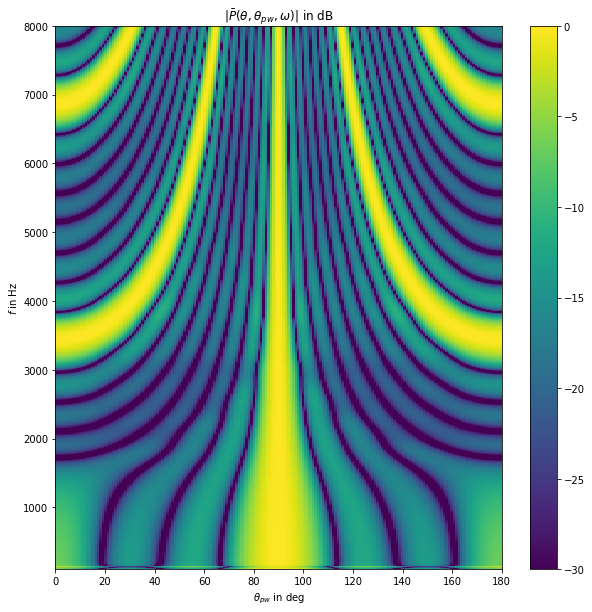

In [4]:
theta_pw = np.linspace(0, np.pi, 181)  # evaluated angles of incident plane waves

B = compute_beampattern(theta, theta_pw, om)
plot_beampattern(B, theta_pw, om)

### Directivity Index

The directivity index is a quantitative measure for the spatial selectivity of the beamformer. First functions for the computation of the directivity factor (DF) and plotting of its logarithm, known as directivity index (DI) are defined.

In [5]:
def compute_directivity_factor(theta, omega):
    d = np.exp(1j*omega * dx/c * np.cos(theta) * np.arange(M)).T
    Gd = np.zeros(shape=(M,M))
    for i in range(M):
        for j in range(M):
            Gd[i, j] = np.sinc(omega * (j-i) * dx/c * 1/np.pi)
    
    return np.dot(np.dot(d.conj().T, np.linalg.inv(Gd)), d)


def plot_directivity_index(DF):
    plt.figure(figsize=(10,5))
    plt.plot(om/(2*np.pi), 10*np.log10(np.abs(DF)))
    plt.xlabel(r'$f$ in Hz')
    plt.ylabel(r'$\mathrm{DI}(\theta, \omega)$ in dB')
    plt.grid()

The resulting DI of the MVDR beamformer is computed and plotted for a steering angle of $\theta = 90^\text{o}$

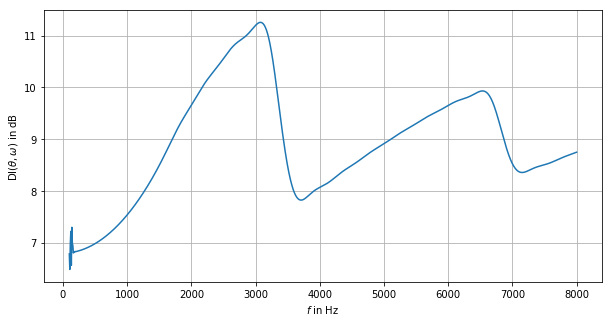

In [6]:
DF = np.zeros(len(om), dtype=complex)
for mu in range(len(om)):
    DF[mu] = compute_directivity_factor(theta, om[mu])

plot_directivity_index(DF)

### White-Noise Gain

The white-noise gain (WNG) characterized the noise attenuation of a beamformer. First functions are defined for computation and plotting of the WNG.

In [7]:
def compute_white_noise_gain(theta, omega):
    d = np.exp(1j*omega * dx/c * np.cos(theta) * np.arange(M)).T
    Gd = np.zeros(shape=(M,M))
    for i in range(M):
        for j in range(M):
            Gd[i, j] = np.sinc(omega * (j-i) * dx/c * 1/np.pi)
    
    WNG = np.dot(np.dot(d.conj().T, np.linalg.inv(Gd)), d)**2 / np.dot(np.dot(d.conj().T, np.linalg.inv(Gd)**2), d)
    
    return WNG

def plot_white_noise_gain(DF):
    plt.figure(figsize=(10,5))
    plt.plot(om/(2*np.pi), 10*np.log10(np.abs(DF)))
    plt.xlabel(r'$f$ in Hz')
    plt.ylabel(r'$\mathrm{WNG}(\theta, \omega)$ in dB')
    plt.grid()

The resulting WNG of the MVDR beamformer is computed and plotted for a steering angle of $\theta = 90^\text{o}$

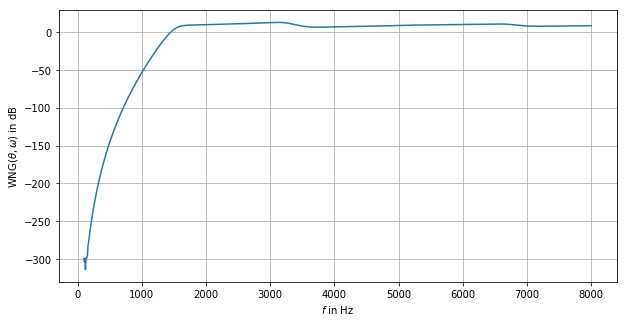

In [8]:
WNG = np.zeros(len(om), dtype=complex)
for mu in range(len(om)):
    WNG[mu] = compute_white_noise_gain(theta, om[mu])

plot_white_noise_gain(WNG)

**Copyright**

This notebook is provided as [Open Educational Resources](https://en.wikipedia.org/wiki/Open_educational_resources). Feel free to use the notebook for your own purposes. The text/images/data are licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Sascha Spors, Selected Topics in Audio Signal Processing - Supplementary Material, 2017*.